# PCA & K-Means Cluster Analysis of Personal IMDB Ratings
1. Attempting to Find patterns in IMDB Ratings over a period of 5 Years. Find insights about preferences etc.
2. Through i. Exploratory Data Analysis, K-Means Clustering.
3. Finding features that result in higher rating.
4. Comparison of autors taste and IMDB Users Taste - AM I A Hipster ?
4. 

### Idea/TO DO 
1. Could do predictive modelling to predict Your Ratings.(Bad-ish Idea, Do later)
2. Visualize, analyze clusters
3. T-Sne plot of the PCs 

### Scaling Data and Principal Component Analysis.
1. Scale Data. (Done, converted all possible values to numeric, Dropped Title, REstore from Original DF)
2. Perform PCA (87 Components explain 50% of theVariance in the Dataset) - Down from 207 Features.
3. Cluster (Doing)
4. Analzse Clusters.(Doing)
5. Visualise Clusters.
5. Profit.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
import warnings

pd.set_option('display.max_rows', 1000)
warnings.filterwarnings('ignore')

#### TODO - REWRITE FOR NEW CLUSTERING METHOD

In [3]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [4]:
path = str(Path.cwd()) + '/imdb_ratings_april_2020.csv'

data = pd.read_csv(path, engine='python', index_col=0)

## Preparing Data

#### Filtering Only Movies

In [5]:
# Filter Dataframe

film_filt = (data['Title Type'] == 'movie')
data_film = data.loc[(film_filt)]
# Keeping Backup Dataframe
data_film_orig = data_film

#### Checking Null Values and Data Types

In [6]:
# 345 Movies 
print(data_film.info())

<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, tt1010048 to tt0993846
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Your Rating     345 non-null    int64  
 1   Date Rated      345 non-null    object 
 2   Title           345 non-null    object 
 3   URL             345 non-null    object 
 4   Title Type      345 non-null    object 
 5   IMDb Rating     345 non-null    float64
 6   Runtime (mins)  345 non-null    int64  
 7   Year            345 non-null    int64  
 8   Genres          345 non-null    object 
 9   Num Votes       345 non-null    int64  
 10  Release Date    345 non-null    object 
 11  Directors       345 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 35.0+ KB
None


## Exploratory Analysis & Visualizations

In [7]:
data_film[['Genre1','Genre2','Genre3','Genre4','Genre5','Genre6','Genre7']] = data_film.Genres.str.split(',', expand=True)
data_film.drop(['Genre2','Genre3', 'Genre4','Genre5','Genre6','Genre7'], axis= 1, inplace = True)
# Loss of info by dropping secondary, tertiary genres but will result in duplication, is complex.

In [8]:
# Loss of info, Lee ukreich, ethan and joel coen etc are big loosers. Complex fix later.
data_film[['Director1','Director2','Director3', 'Director4']] = data_film.Directors.str.split(',', expand=True)
data_film.drop(['Director2','Director3', 'Director4'], axis = 1, inplace = True)

In [9]:
data_film.drop(['Genres', 'Directors'], axis = 1, inplace = True)

### Univariate 

#### BoxPlots for Quantitative Vars.
Insights:
1. Most of the Ratings lie between the rating 7 and 8, this is slightly lower compared to the IMDb users, But this could be misleading as Discrete vs Continuous Comaprison.
2. The author generally likes watching Longer Movies.
3. Although most movies watched are newer, their is a long tail towards older movies, author doesn't mind the occassional older movies.
4. Majority of the movies watched are on the lower end of Popularity. 

In [41]:
def plot_box_num_uni(df):
    """ Plots Boxplots for all Numerical Columns in Dataframe.
    """
    fig = plt.figure()
    fig.set_figheight(30)
    fig.set_figwidth(20)
    for i, item in enumerate(df.select_dtypes([np.number]).columns.to_list()):
        ax = fig.add_subplot(len(df.select_dtypes([np.number]).columns.to_list()), 3, i+1)
        sns.boxplot(x = str(item), data = df)
        ax.set_title(item)

    fig.show()

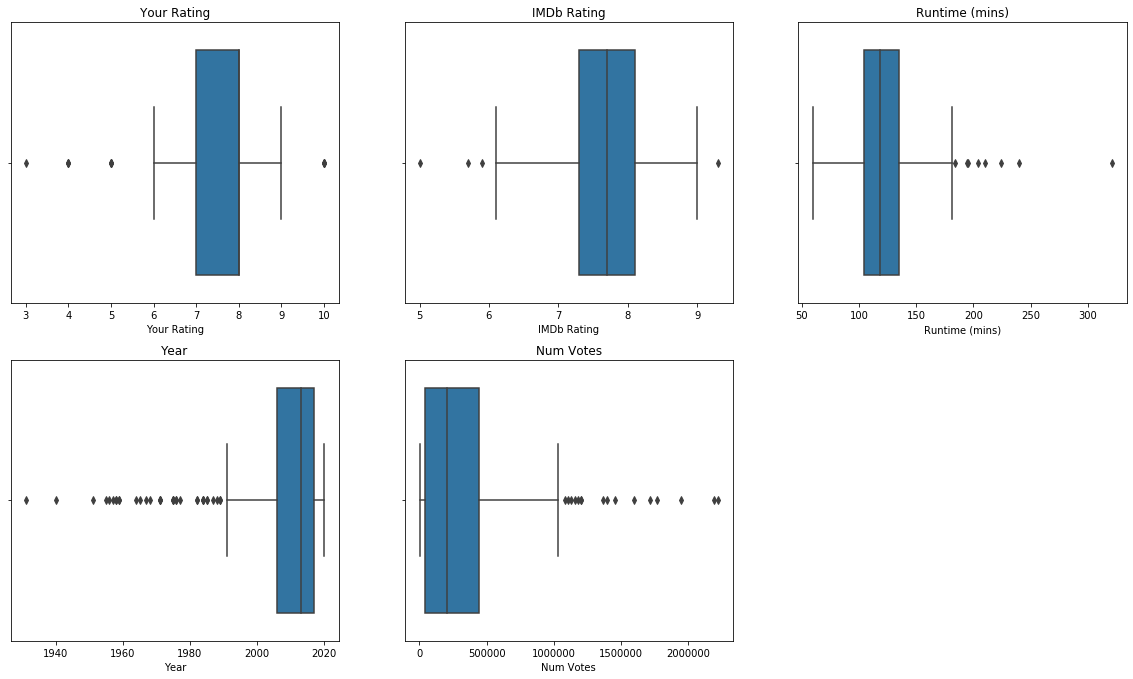

In [42]:
plot_box_num_uni(data_film)

#### Division of Ratings accross Genres

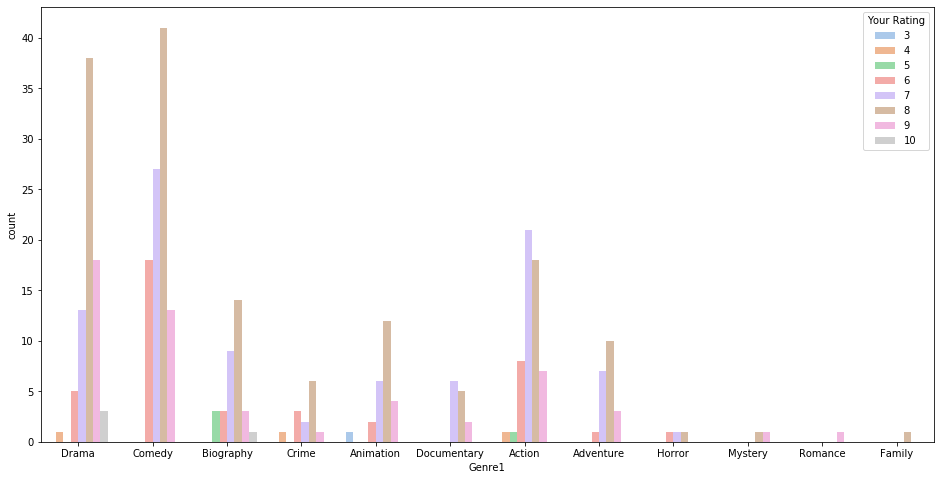

In [27]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x = 'Genre1', data = data_film, hue="Your Rating", palette="pastel")
ax.legend(loc='upper right', title = 'Your Rating')
plt.show()

#### Most Watched Directors

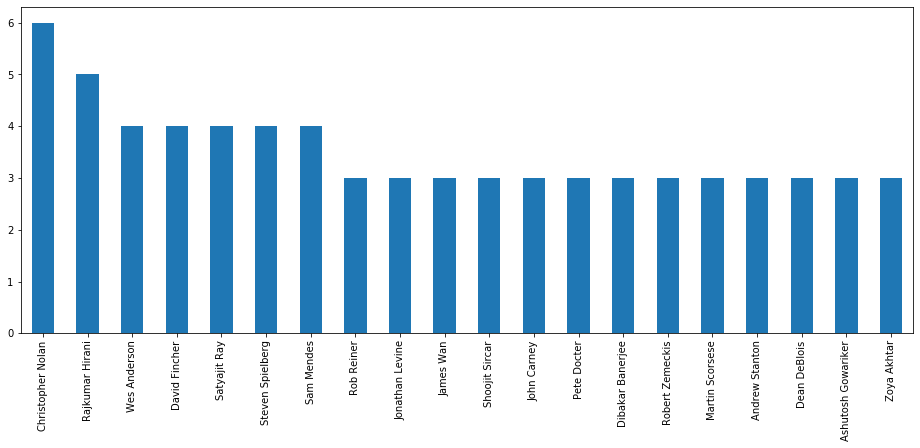

In [15]:
plt.figure(figsize = (16,6))
data_film.Director1.value_counts()[:20].plot(kind = 'bar')
plt.show()

## Bivariate Analysis With Respect to 'Your Rating'
1. I generally follow the same trends as the IMDb ratings. The movies I've rated the highest tend to be highly rated movies in general. There is a large percentage of movies I've rated lower that the IMDb public likes.
2. The lowest rated movies tend to have longer run times compared to the average movies. The highest rated movies tend to be longer too.
3. Most higher rated movies are more spread out when it comes to year of release. The violin plot shows this better.
4. There is high spread in the popularity of the movies rated higher. Will check relationship using Linear Regression later.

In [30]:
def plot_box_num_biv(df, categ):
    """ Plots Boxplots for all Numerical Columns in Dataframe with respect to a categorical column.
    """
    fig = plt.figure()
    fig.set_figheight(30)
    fig.set_figwidth(20)
    for i, item in enumerate(df.select_dtypes([np.number]).columns.to_list()):
        ax = fig.add_subplot(len(df.select_dtypes([np.number]).columns.to_list()), 2, i+1)
        sns.boxplot(x = categ, y = str(item), data = df)
        ax.set_title(item)

    fig.show()

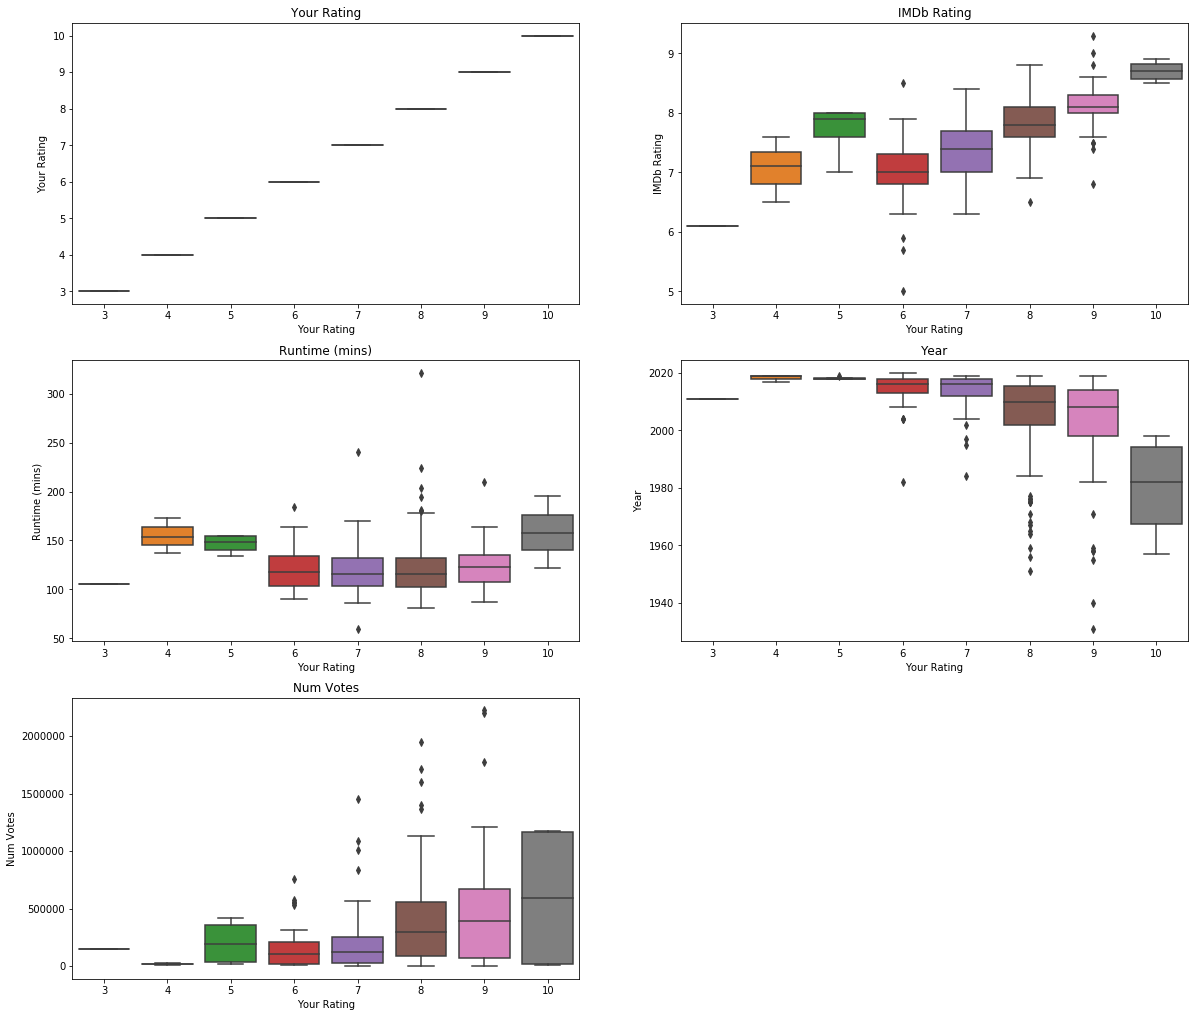

In [31]:
plot_box_num_biv(data_film, 'Your Rating')

## Checking Relationships Between Data

#### Linear Regression Plots to check If there is a Linear Relationships between Your Rating and Other Quantitaive Vars.
1. There is a Strong Positive Linear Relationship between IMDb user Ratings and My Ratings, not significantly different rating habit. There are quite a few outliers visible.
2. No SIgnificant Relationship linear relationship between runtime and Your rating. There are high leverage points.
3. Appears to be strong negative relationship between Year of release and Your Rating, favors older movies but pretty imbalanced data. (Check Leverage Statistics to see if this is a problem.)
4. Appears to be a weak positive relationship between popularity (Num of votes) and Your rating. Some high leverage points. Comparing with Rating by IMDb users, this relationship appears to be weaker.

In [56]:
def plot_lin_num_biv(df):
    """ Plots Boxplots for all Numerical Columns in Dataframe with respect to a categorical column.
    """
    fig = plt.figure()
    fig.set_figheight(30)
    fig.set_figwidth(20)
    for i, item in enumerate(df.select_dtypes([np.number]).columns.to_list()):
        ax = fig.add_subplot(len(df.select_dtypes([np.number]).columns.to_list()), 2, i+1)
        sns.regplot(y = 'Your Rating', x = str(item), data = data_film)
        ax.set_title(item)

    fig.show()

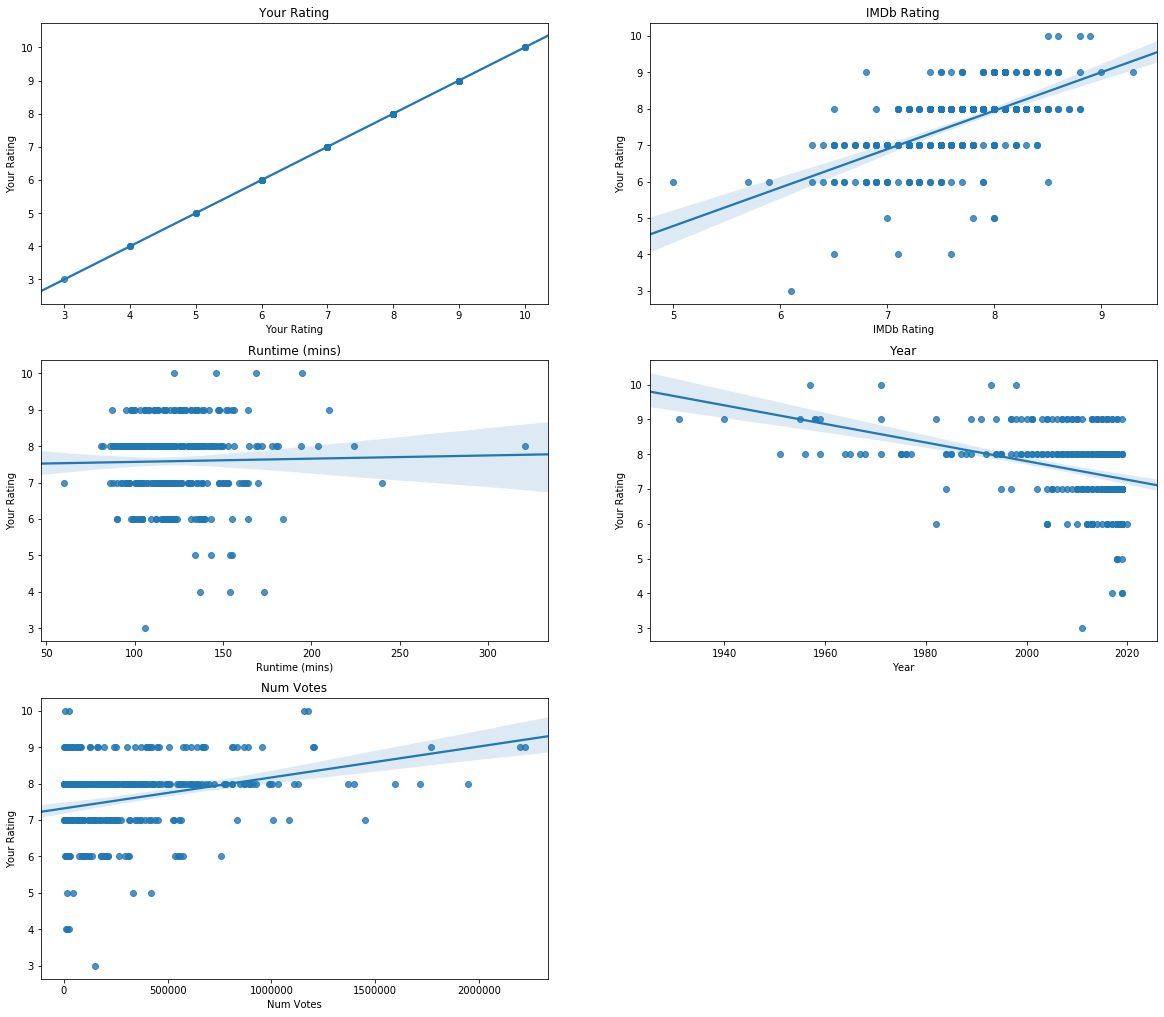

In [55]:
plot_lin_num_biv(data_film)

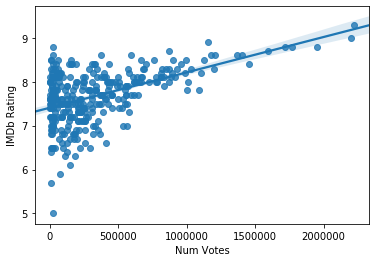

In [57]:
sns.regplot(y = 'IMDb Rating', x = 'Num Votes', data = data_film)

## Preparing Data for Clustering

#### Lets see if we can manually see clusters

Text(0, 0.5, 'Rating')

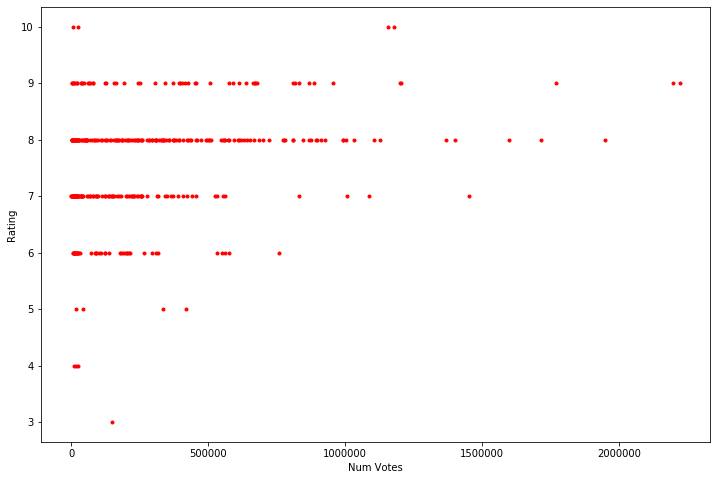

In [61]:
plt.figure(figsize=(12,8))
plt.plot( data_film['Num Votes'], data_film['Your Rating'].to_list(), 'r.')
plt.xlabel('Num Votes')
plt.ylabel('Rating')

### Feature Engineering - One - Hot encode Genre, Directors and Dropping a few Columns, Convert Rated to Numerical

In [62]:
data_film = pd.get_dummies(data_film, prefix='Genre', columns=['Genre1'])

In [63]:
data_film = pd.get_dummies(data_film, prefix='Director', columns=['Director1'])

In [64]:
data_film[['Rated_Year', 'Rated_month', 'Rated_Day']] = data_film['Date Rated'].str.split('-', expand = True)
data_film.drop(['Rated_month', 'Rated_Day'], axis = 1, inplace = True)

In [65]:
data_film.drop('Date Rated', axis = 1, inplace = True)

In [66]:
data_film[['Release_Year', 'Release_month', 'Release_Day']] = data_film['Release Date'].str.split('-', expand = True)
data_film.drop(['Release_month', 'Release_Day'], axis = 1, inplace = True)

In [67]:
data_film.drop('Release Date', axis = 1, inplace = True)

In [68]:
data_film.drop(['Title Type', 'URL'], axis = 1, inplace = True)

### Making Copy as we'll drop Title and convert to numeric

In [70]:
data_film_num = data_film

In [71]:
data_film_num.drop(['Title'], axis = 1, inplace=True)

In [72]:
data_film_num.drop(['Release_Year'], axis = 1, inplace=True)

In [73]:
data_film_num['Rated_Year'] = data_film_num['Rated_Year'].astype(int)

#### Visualizing New Info

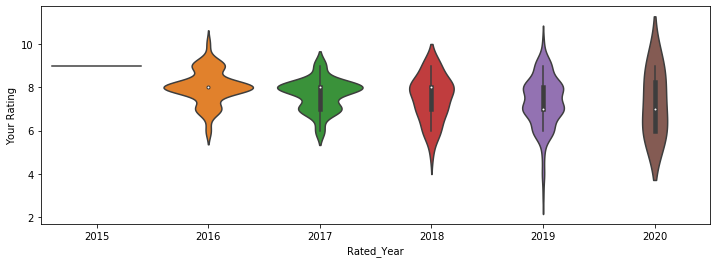

In [76]:
plt.figure(figsize=(12,4))
sns.violinplot(x = 'Rated_Year', y = 'Your Rating', data =data_film_num )

# Curse of Dimensionality - 273 Features for 345 samples

## Standardize Data

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
data_film_scaled = StandardScaler().fit_transform(data_film_num.values)

### Restoring Indexes And Column Names

In [89]:
data_film_scaled_df = pd.DataFrame(data = data_film_scaled, index = data_film_num.index, columns = data_film_num.columns)

# Principal Components Analysis to Reduce Dimensionality of Data

#### Lets Target that 50% Percent of the Variance is explained by the principal components

In [90]:
from sklearn.decomposition import PCA

target_variance = 0.50

for i in range(len(data_film_scaled_df.columns)):
    pca_film = PCA(n_components=i)
    pca_components_film = pca_film.fit_transform(data_film_scaled_df)
    #print(f'Total Explained Variance is {np.sum(pca_film.explained_variance_ratio_)}')
    if np.sum(pca_film.explained_variance_ratio_) > target_variance:
        #print(f'No of Components that explain 50% of Variance: {i}')
        break

print(f'No of Components that explain 50% of Variance: {i}')

No of Components that explain 50% of Variance: 120


### Visualizing important Features for First Principal Component
No single features dominates, which is a good.

In [92]:
first_comp = pca_film.components_[0]
# Creating Dataframe for correspoding Columns in original Dataframe
first_comps = pd.DataFrame(zip(first_comp, data_film_scaled_df.columns), columns = ['Weights', 'Features'])
first_comps['abs_weights']=first_comps['Weights'].apply(lambda x: np.abs(x))

In [103]:
first_comps.sort_values('abs_weights', ascending=False)[:20]

Weights                       Features  abs_weights
1    0.458327                    IMDb Rating     0.458327
0    0.408970                    Your Rating     0.408970
4    0.346599                      Num Votes     0.346599
3   -0.288688                           Year     0.288688
9   -0.213825                   Genre_Comedy     0.213825
12   0.180817                    Genre_Drama     0.180817
2    0.150680                 Runtime (mins)     0.150680
272 -0.142391                     Rated_Year     0.142391
69   0.127985     Director_Christopher Nolan     0.127985
97   0.100570        Director_Frank Darabont     0.100570
236  0.092605          Director_Satyajit Ray     0.092605
107  0.090502             Director_Guru Dutt     0.090502
79   0.089954         Director_David Fincher     0.089954
255  0.088855      Director_Steven Spielberg     0.088855
11  -0.082401              Genre_Documentary     0.082401
59  -0.077535        Director_Bradford Lewis     0.077535
226  0.071115       Director_Robert Zemeckis     0.071115
111  0.068223  Director_Hrishikesh Mukherjee     0.068223
67   0.066211       Director_Charles Chaplin     0.066211
173 -0.065756         Director_Meghna Gulzar     0.065756

In [94]:
list_pca_film = list(pca_components_film)

# Fitting Kmeans - Clustering Using Principal Components

<b>TO DO: </b>
1. Visualize these clusters based on some features.
2. SSE Score for K-Means Clustering

### Finding Optimal Number of Clusters - Using Elbow Method and SSE Score
1. An Elbow somewhat appears at 85 clusters. 

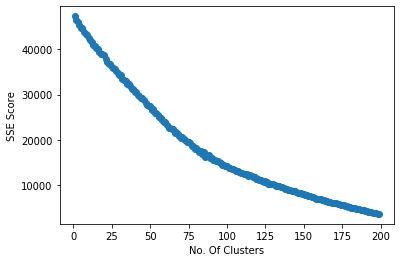

In [100]:
# calculate distortion for a range of number of cluster
from sklearn.cluster import KMeans


distortions = []

for i in range(1,200):
    cluster_film = KMeans(n_clusters = i, n_init=10, max_iter= 100).fit(list_pca_film)
    distortions.append(cluster_film.inertia_)
    
plt.xlabel('No. Of Clusters')
plt.ylabel('SSE Score')
plt.plot(range(1, 200), distortions, marker='o')
plt.savefig('Clusters_SSE_plot.jpg')

In [144]:
cluster_film = KMeans(n_clusters = 85, n_init=10, max_iter= 100).fit(list_pca_film)
pred_film = cluster_film.labels_

### Lets Place the cluster labels back into dataframe and check which Movies got Clustered Together.
## TO DO 
Data_film_orig has modified genre, check what happenned.

In [146]:
data_film_orig['Clusters'] = pred_film

# Analyzing the Clusters

In [147]:
grouped_df = data_film_orig.groupby(['Clusters'])

clust_0 = grouped_df.get_group(0)
clust_1 = grouped_df.get_group(1)
clust_2 = grouped_df.get_group(2)
clust_3 = grouped_df.get_group(3)
clust_4 = grouped_df.get_group(4)


# Appaears to be cluster of comedies, Mostly New Movies
clust_5 = grouped_df.get_group(5)

# Appears to be Cluster of Biographies, Dramas, Mostly new Movies
clust_16 = grouped_df.get_group(16)

# Appears to be Newer Action Movies
clust_21 = grouped_df.get_group(21)

# Appears to be Dramas
clust_28 = grouped_df.get_group(28)

# lower Rated Comedies
clust_31 = grouped_df.get_group(31)

# Slightly older comedy- Dramas, rated higher
clust_35 = grouped_df.get_group(35)

### Investigating Clusters

### The splits are still Mostly on the basis of ratings.

In [148]:
data_film_orig.groupby(['Clusters'])['Your Rating'].size()

Clusters
0      3
1      6
2      2
3      2
4     11
5      3
6      3
7      4
8     32
9      2
10     4
11     1
12     2
13     3
14     7
15     4
16     2
17     3
18     3
19    21
20     1
21     2
22     4
23     1
24     2
25     5
26     2
27     3
28     2
29     9
30     2
31     2
32     4
33     2
34     1
35     3
36     1
37     3
38     2
39     2
40     2
41    20
42     2
43     2
44     2
45     2
46     2
47     2
48     3
49    31
50     5
51     2
52     3
53     2
54     2
55     3
56     2
57     2
58     2
59     2
60     2
61     2
62     2
63     2
64     1
65     3
66     7
67     1
68     2
69     3
70     8
71     2
72     1
73     2
74     1
75    23
76     1
77     3
78     1
79     1
80     2
81     1
82     1
83     1
84     8
Name: Your Rating, dtype: int64

In [322]:
#data_film_orig.groupby(['Clusters'])['Your Rating'].mean()
# A group of movies that is highly rated and a group with low ratings.
# Lets investigate these groups 

### Cluster Statistics

In [149]:
data_film_cluster_stats = data_film_orig.groupby(['Clusters'])['Your Rating'].count()

In [150]:
data_film_cluster_stats = data_film_cluster_stats.to_frame('Count')

In [151]:
data_film_cluster_stats['your_imdb_Rating_Mean_Difference'] = data_film_orig.groupby(['Clusters'])['Your Rating'].mean() - data_film_orig.groupby(['Clusters'])['IMDb Rating'].mean()

In [152]:
data_film_cluster_stats.sort_values('Count', ascending=False, inplace=True)

In [153]:
# Only Keeping clusters with atleast 5 movies
cluster_stat_large = data_film_cluster_stats.loc[(data_film_cluster_stats['Count'] >=3)]

In [154]:
cluster_stat_large.sort_values('your_imdb_Rating_Mean_Difference')

Count  your_imdb_Rating_Mean_Difference
Clusters                                         
84            8                         -1.350000
6             3                         -1.266667
29            9                         -0.866667
25            5                         -0.700000
37            3                         -0.566667
1             6                         -0.533333
75           23                         -0.526087
70            8                         -0.487500
19           21                         -0.300000
52            3                         -0.300000
35            3                         -0.133333
77            3                         -0.133333
41           20                         -0.090000
7             4                         -0.050000
48            3                         -0.033333
69            3                         -0.033333
22            4                         -0.025000
65            3                          0.000000
14            7                          0.000000
49           31                          0.035484
0             3                          0.066667
18            3                          0.133333
27            3                          0.133333
32            4                          0.150000
4            11                          0.172727
50            5                          0.220000
66            7                          0.314286
17            3                          0.333333
8            32                          0.446875
55            3                          0.466667
10            4                          0.525000
15            4                          0.525000
5             3                          0.533333
13            3                          0.666667

## Negative Skews

In [164]:
data_film_orig.loc[data_film_orig['Title'] == 'The Cove']

Your Rating  Date Rated     Title  \
Const                                          
tt1313104            8  2019-08-23  The Cove   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1313104  https://www.imdb.com/title/tt1313104/      movie          8.4   

           Runtime (mins)  Year  Num Votes Release Date       Genre1  \
Const                                                                  
tt1313104              92  2009      46345   2009-04-25  Documentary   

                Director1  Clusters  
Const                                
tt1313104  Louie Psihoyos        66

In [166]:
clust_13 = grouped_df.get_group(4)

clust_13.head(100)

Your Rating  Date Rated                            Title  \
Const                                                                 
tt0111161            9  2019-06-20         The Shawshank Redemption   
tt0119217            9  2019-10-12                Good Will Hunting   
tt0213847            8  2019-01-30                           Mal�na   
tt2911666            8  2019-01-08                        John Wick   
tt0449059            8  2019-07-02             Little Miss Sunshine   
tt5164432            7  2018-08-17                      Love, Simon   
tt5571734            9  2019-10-05                             Pink   
tt0061722            8  2017-02-08                     The Graduate   
tt7242142            8  2019-02-25                    Blindspotting   
tt0073486            8  2019-08-23  One Flew Over the Cuckoo's Nest   
tt0095953            8  2019-10-06                         Rain Man   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt0111161  https://www.imdb.com/title/tt0111161/      movie          9.3   
tt0119217  https://www.imdb.com/title/tt0119217/      movie          8.3   
tt0213847  https://www.imdb.com/title/tt0213847/      movie          7.5   
tt2911666  https://www.imdb.com/title/tt2911666/      movie          7.4   
tt0449059  https://www.imdb.com/title/tt0449059/      movie          7.8   
tt5164432  https://www.imdb.com/title/tt5164432/      movie          7.6   
tt5571734  https://www.imdb.com/title/tt5571734/      movie          8.1   
tt0061722  https://www.imdb.com/title/tt0061722/      movie          8.0   
tt7242142  https://www.imdb.com/title/tt7242142/      movie          7.4   
tt0073486  https://www.imdb.com/title/tt0073486/      movie          8.7   
tt0095953  https://www.imdb.com/title/tt0095953/      movie          8.0   

           Runtime (mins)  Year  Num Votes Release Date  Genre1  \
Const                                                             
tt0111161             142  1994    2222896   1994-09-10   Drama   
tt0119217             126  1997     816598   1997-12-02   Drama   
tt0213847             108  2000      85097   2000-10-26  Comedy   
tt2911666             101  2014     504259   2014-09-19  Action   
tt0449059             101  2006     424692   2006-01-20  Comedy   
tt5164432             110  2018      90567   2018-02-27  Comedy   
tt5571734             136  2016      35592   2016-09-16   Drama   
tt0061722             106  1967     246032   1967-12-20  Comedy   
tt7242142              95  2018      22719   2018-01-18  Comedy   
tt0073486             133  1975     874146   1975-11-19   Drama   
tt0095953             133  1988     457760   1988-12-12   Drama   

                         Director1  Clusters  
Const                                         
tt0111161           Frank Darabont         4  
tt0119217             Gus Van Sant         4  
tt0213847       Giuseppe Tornatore         4  
tt2911666             David Leitch         4  
tt0449059          Jonathan Dayton         4  
tt5164432            Greg Berlanti         4  
tt5571734  Aniruddha Roy Chowdhury         4  
tt0061722             Mike Nichols         4  
tt7242142     Carlos L�pez Estrada         4  
tt0073486             Milos Forman         4  
tt0095953           Barry Levinson         4

### Cluster 2 Has largest Skew of negative votes from me.
Rajkumar Hirani Movies - Negative Skew mostly due to Sanju.
Check p value for statistical significance.

In [387]:
clust_2 = grouped_df.get_group(2)

clust_2.head()

Your Rating  Date Rated                 Title  \
Const                                                      
tt1187043            8  2016-04-27              3 Idiots   
tt2338151            8  2016-09-01                    PK   
tt0374887            9  2016-09-01   Munna Bhai M.B.B.S.   
tt0456144            8  2016-10-06  Lage Raho Munna Bhai   
tt6452574            5  2018-11-29                 Sanju   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1187043  https://www.imdb.com/title/tt1187043/      movie          8.4   
tt2338151  https://www.imdb.com/title/tt2338151/      movie          8.2   
tt0374887  https://www.imdb.com/title/tt0374887/      movie          8.2   
tt0456144  https://www.imdb.com/title/tt0456144/      movie          8.1   
tt6452574  https://www.imdb.com/title/tt6452574/      movie          8.0   

           Runtime (mins)  Year                           Genres  Num Votes  \
Const                                                                         
tt1187043             170  2009                    Comedy, Drama     289841   
tt2338151             153  2014   Comedy, Drama, Fantasy, Sci-Fi     131980   
tt0374887             156  2003           Comedy, Drama, Musical      62644   
tt0456144             144  2006  Comedy, Drama, Fantasy, Romance      37247   
tt6452574             155  2018                 Biography, Drama      36819   

          Release Date        Directors  Clusters  
Const                                              
tt1187043   2009-12-23  Rajkumar Hirani         2  
tt2338151   2014-12-18  Rajkumar Hirani         2  
tt0374887   2003-12-19  Rajkumar Hirani         2  
tt0456144   2006-09-01  Rajkumar Hirani         2  
tt6452574   2018-06-28  Rajkumar Hirani         2

### Cluster - 8
Hindi Movies I tend to rate lower, significant cluster since there is no language information in original dataset.

In [390]:
clust_8 = grouped_df.get_group(8)

clust_8.head()

Your Rating  Date Rated               Title  \
Const                                                    
tt1093370            9  2018-06-13          Jab We Met   
tt0120338            8  2018-09-22             Titanic   
tt1839596            7  2016-09-01            Rockstar   
tt1954470            8  2016-10-18  Gangs of Wasseypur   
tt5074352            8  2019-01-08              Dangal   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1093370  https://www.imdb.com/title/tt1093370/      movie          7.9   
tt0120338  https://www.imdb.com/title/tt0120338/      movie          7.8   
tt1839596  https://www.imdb.com/title/tt1839596/      movie          7.7   
tt1954470  https://www.imdb.com/title/tt1954470/      movie          8.2   
tt5074352  https://www.imdb.com/title/tt5074352/      movie          8.5   

           Runtime (mins)  Year                                  Genres  \
Const                                                                     
tt1093370             138  2007                  Comedy, Drama, Romance   
tt0120338             194  1997                          Drama, Romance   
tt1839596             159  2011          Drama, Music, Musical, Romance   
tt1954470             321  2012  Action, Comedy, Crime, Drama, Thriller   
tt5074352             161  2016         Action, Biography, Drama, Sport   

           Num Votes Release Date       Directors  Clusters  
Const                                                        
tt1093370      41057   2007-10-26      Imtiaz Ali         8  
tt0120338     929842   1997-11-01   James Cameron         8  
tt1839596      33703   2011-11-11      Imtiaz Ali         8  
tt1954470      66854   2012-05-22  Anurag Kashyap         8  
tt5074352     113222   2016-12-21   Nitesh Tiwari         8

### Cluster 31, Comedies 
No likee

In [400]:
clust_31.head(2)

Your Rating  Date Rated                 Title  \
Const                                                      
tt1336608            6  2016-10-27          Rock of Ages   
tt1570728            7  2017-03-29  Crazy, Stupid, Love.   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1336608  https://www.imdb.com/title/tt1336608/      movie          5.9   
tt1570728  https://www.imdb.com/title/tt1570728/      movie          7.4   

           Runtime (mins)  Year                           Genres  Num Votes  \
Const                                                                         
tt1336608             123  2012  Comedy, Drama, Musical, Romance      68961   
tt1570728             118  2011           Comedy, Drama, Romance     429685   

          Release Date                  Directors  Clusters  
Const                                                        
tt1336608   2012-06-13              Adam Shankman        31  
tt1570728   2011-07-19  Glenn Ficarra, John Requa        31

## Positive Skews

### Cluster 27 - Older Popular Dramas
Rate Highly

In [401]:
clust_27.head()

Your Rating  Date Rated                            Title  \
Const                                                                 
tt0111161           10  2017-02-04         The Shawshank Redemption   
tt0061722            8  2017-02-08                     The Graduate   
tt0066763           10  2016-09-01                            Anand   
tt0073486            9  2017-04-01  One Flew Over the Cuckoo's Nest   
tt0095953            9  2018-12-23                         Rain Man   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt0111161  https://www.imdb.com/title/tt0111161/      movie          9.3   
tt0061722  https://www.imdb.com/title/tt0061722/      movie          8.0   
tt0066763  https://www.imdb.com/title/tt0066763/      movie          8.8   
tt0073486  https://www.imdb.com/title/tt0073486/      movie          8.7   
tt0095953  https://www.imdb.com/title/tt0095953/      movie          8.0   

           Runtime (mins)  Year                  Genres  Num Votes  \
Const                                                                
tt0111161             142  1994                   Drama    2039088   
tt0061722             106  1967  Comedy, Drama, Romance     234011   
tt0066763             122  1971                   Drama      21909   
tt0073486             133  1975                   Drama     809931   
tt0095953             133  1988                   Drama     433634   

          Release Date             Directors  Clusters  
Const                                                   
tt0111161   1994-09-10        Frank Darabont        27  
tt0061722   1967-12-21          Mike Nichols        27  
tt0066763   1971-03-12  Hrishikesh Mukherjee        27  
tt0073486   1975-11-19          Milos Forman        27  
tt0095953   1988-12-12        Barry Levinson        27

### Cluster 4 - Documentaries, Rated Highly

In [408]:
clust_4.head()

Your Rating  Date Rated            Title  \
Const                                                 
tt1313104            9  2017-01-22         The Cove   
tt1424432            9  2016-04-21            Senna   
tt2518788            9  2015-06-07                1   
tt4354792            8  2019-01-11           Jai Ho   
tt4875844            8  2017-03-03  The 24 Hour War   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1313104  https://www.imdb.com/title/tt1313104/      movie          8.4   
tt1424432  https://www.imdb.com/title/tt1424432/      movie          8.6   
tt2518788  https://www.imdb.com/title/tt2518788/      movie          8.0   
tt4354792  https://www.imdb.com/title/tt4354792/      movie          7.8   
tt4875844  https://www.imdb.com/title/tt4875844/      movie          7.3   

           Runtime (mins)  Year                         Genres  Num Votes  \
Const                                                                       
tt1313104              92  2009             Documentary, Crime      44623   
tt1424432             106  2010  Documentary, Biography, Sport      53164   
tt2518788             112  2013    Documentary, History, Sport       3307   
tt4354792              60  2014  Documentary, Biography, Music         33   
tt4875844              99  2016           Documentary, History        682   

          Release Date                 Directors  Clusters  
Const                                                       
tt1313104   2009-04-25            Louie Psihoyos         4  
tt1424432   2010-10-07              Asif Kapadia         4  
tt2518788   2013-09-19              Paul Crowder         4  
tt4354792          NaN            Umesh Aggarwal         4  
tt4875844   2016-12-31  Nate Adams, Adam Carolla         4

### cluster 28,  Dramas, Romance, war, Music

In [410]:
clust_28.head(2)

Your Rating  Date Rated                Title  \
Const                                                     
tt1010048            8  2016-10-18  Slumdog Millionaire   
tt0112471            8  2018-09-22       Before Sunrise   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1010048  https://www.imdb.com/title/tt1010048/      movie          8.0   
tt0112471  https://www.imdb.com/title/tt0112471/      movie          8.1   

           Runtime (mins)  Year          Genres  Num Votes Release Date  \
Const                                                                     
tt1010048             120  2008  Drama, Romance     733122   2008-08-30   
tt0112471             101  1995  Drama, Romance     231547   1995-01-19   

                              Directors  Clusters  
Const                                              
tt1010048  Loveleen Tandan, Danny Boyle        28  
tt0112471             Richard Linklater        28

### Cluster 35 - Comedy - Drama

In [411]:
clust_35

Your Rating  Date Rated                 Title  \
Const                                                      
tt1022603            8  2016-12-17  (500) Days of Summer   
tt1033575            8  2016-12-17       The Descendants   
tt0118799            9  2018-01-01       La vita � bella   
tt0120382            9  2016-09-01       The Truman Show   
tt1306980            8  2016-12-04                 50/50   
tt1714832            7  2016-10-18        Do Dooni Chaar   
tt0088847            8  2016-04-27    The Breakfast Club   
tt0097165           10  2016-04-27    Dead Poets Society   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1022603  https://www.imdb.com/title/tt1022603/      movie          7.7   
tt1033575  https://www.imdb.com/title/tt1033575/      movie          7.3   
tt0118799  https://www.imdb.com/title/tt0118799/      movie          8.6   
tt0120382  https://www.imdb.com/title/tt0120382/      movie          8.1   
tt1306980  https://www.imdb.com/title/tt1306980/      movie          7.7   
tt1714832  https://www.imdb.com/title/tt1714832/      movie          7.6   
tt0088847  https://www.imdb.com/title/tt0088847/      movie          7.9   
tt0097165  https://www.imdb.com/title/tt0097165/      movie          8.1   

           Runtime (mins)  Year                       Genres  Num Votes  \
Const                                                                     
tt1022603              95  2009       Comedy, Drama, Romance     432979   
tt1033575             115  2011                Comedy, Drama     221377   
tt0118799             116  1997  Comedy, Drama, Romance, War     534947   
tt0120382             103  1998        Comedy, Drama, Sci-Fi     815410   
tt1306980             100  2011       Comedy, Drama, Romance     296897   
tt1714832             112  2010                Comedy, Drama       4377   
tt0088847              97  1985                Comedy, Drama     310854   
tt0097165             128  1989                Comedy, Drama     355592   

          Release Date        Directors  Clusters  
Const                                              
tt1022603   2009-01-17        Marc Webb        35  
tt1033575   2011-09-02  Alexander Payne        35  
tt0118799   1997-12-20  Roberto Benigni        35  
tt0120382   1998-06-01       Peter Weir        35  
tt1306980   2011-09-12  Jonathan Levine        35  
tt1714832   2010-10-08     Habib Faisal        35  
tt0088847   1985-02-07      John Hughes        35  
tt0097165   1989-06-02       Peter Weir        35

In [388]:
#data_film_orig.groupby(['Clusters'])['Your Rating'].mean() - data_film_orig.groupby(['Clusters'])['IMDb Rating'].mean()


# Low standard Deviation in ratings, so, probably has clustered some sort of relationship.

In [339]:
clust_12 = grouped_df.get_group(12)

In [340]:
clust_12.head()

Your Rating  Date Rated      Title  \
Const                                           
tt0114709            8  2017-12-11  Toy Story   
tt1216475            5  2017-10-24     Cars 2   
tt0317219            7  2016-11-07       Cars   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt0114709  https://www.imdb.com/title/tt0114709/      movie          8.3   
tt1216475  https://www.imdb.com/title/tt1216475/      movie          6.2   
tt0317219  https://www.imdb.com/title/tt0317219/      movie          7.1   

           Runtime (mins)  Year  \
Const                             
tt0114709              81  1995   
tt1216475             106  2011   
tt0317219             117  2006   

                                                  Genres  Num Votes  \
Const                                                                 
tt0114709  Animation, Adventure, Comedy, Family, Fantasy     768734   
tt1216475    Animation, Adventure, Comedy, Family, Sport     132628   
tt0317219               Animation, Comedy, Family, Sport     318006   

          Release Date                  Directors  Clusters  
Const                                                        
tt0114709   1995-11-19              John Lasseter        12  
tt1216475   2011-06-18  John Lasseter, Brad Lewis        12  
tt0317219   2006-03-14   John Lasseter, Joe Ranft        12

In [334]:
# Movies by Spielberg
clust_15 = grouped_df.get_group(15)

clust_15.head()

Your Rating  Date Rated                Title  \
Const                                                     
tt0120815           10  2016-04-27  Saving Private Ryan   
tt0264464            8  2016-09-01  Catch Me If You Can   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt0120815  https://www.imdb.com/title/tt0120815/      movie          8.6   
tt0264464  https://www.imdb.com/title/tt0264464/      movie          8.1   

           Runtime (mins)  Year                   Genres  Num Votes  \
Const                                                                 
tt0120815             169  1998               Drama, War    1076831   
tt0264464             141  2002  Biography, Crime, Drama     693452   

          Release Date         Directors  Clusters  
Const                                               
tt0120815   1998-07-21  Steven Spielberg        15  
tt0264464   2002-12-16  Steven Spielberg        15

In [406]:
clust_16.head(3)

Your Rating  Date Rated                 Title  \
Const                                                      
tt1024648            8  2016-04-27                  Argo   
tt0103939            8  2017-04-04               Chaplin   
tt1485796            8  2018-07-01  The Greatest Showman   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1024648  https://www.imdb.com/title/tt1024648/      movie          7.7   
tt0103939  https://www.imdb.com/title/tt0103939/      movie          7.6   
tt1485796  https://www.imdb.com/title/tt1485796/      movie          7.7   

           Runtime (mins)  Year                      Genres  Num Votes  \
Const                                                                    
tt1024648             120  2012  Biography, Drama, Thriller     525225   
tt0103939             143  1992    Biography, Comedy, Drama      48783   
tt1485796             105  2017   Biography, Drama, Musical     181598   

          Release Date             Directors  Clusters  
Const                                                   
tt1024648   2012-08-31           Ben Affleck        16  
tt0103939   1992-12-16  Richard Attenborough        16  
tt1485796   2017-12-20        Michael Gracey        16

In [405]:
clust_21.head(4)

Your Rating  Date Rated               Title  \
Const                                                    
tt1211837            7  2018-07-11      Doctor Strange   
tt1392190            9  2016-10-18  Mad Max: Fury Road   
tt1431045            8  2016-04-27            Deadpool   
tt1631867            9  2017-03-10    Edge of Tomorrow   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1211837  https://www.imdb.com/title/tt1211837/      movie          7.5   
tt1392190  https://www.imdb.com/title/tt1392190/      movie          8.1   
tt1431045  https://www.imdb.com/title/tt1431045/      movie          8.0   
tt1631867  https://www.imdb.com/title/tt1631867/      movie          7.9   

           Runtime (mins)  Year                               Genres  \
Const                                                                  
tt1211837             115  2016   Action, Adventure, Fantasy, Sci-Fi   
tt1392190             120  2015  Action, Adventure, Sci-Fi, Thriller   
tt1431045             108  2016    Action, Adventure, Comedy, Sci-Fi   
tt1631867             113  2014                       Action, Sci-Fi   

           Num Votes Release Date         Directors  Clusters  
Const                                                          
tt1211837     472650   2016-10-13  Scott Derrickson        21  
tt1392190     755029   2015-05-07     George Miller        21  
tt1431045     788580   2016-01-21        Tim Miller        21  
tt1631867     532590   2014-05-28        Doug Liman        21

In [402]:
clust_28.head(5)

Your Rating  Date Rated                Title  \
Const                                                     
tt1010048            8  2016-10-18  Slumdog Millionaire   
tt0112471            8  2018-09-22       Before Sunrise   
tt1179933            8  2016-09-01  10 Cloverfield Lane   
tt0119217           10  2016-09-05    Good Will Hunting   
tt1193138            8  2016-12-17        Up in the Air   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1010048  https://www.imdb.com/title/tt1010048/      movie          8.0   
tt0112471  https://www.imdb.com/title/tt0112471/      movie          8.1   
tt1179933  https://www.imdb.com/title/tt1179933/      movie          7.2   
tt0119217  https://www.imdb.com/title/tt0119217/      movie          8.3   
tt1193138  https://www.imdb.com/title/tt1193138/      movie          7.4   

           Runtime (mins)  Year                                    Genres  \
Const                                                                       
tt1010048             120  2008                            Drama, Romance   
tt0112471             101  1995                            Drama, Romance   
tt1179933             103  2016  Drama, Horror, Mystery, Sci-Fi, Thriller   
tt0119217             126  1997                            Drama, Romance   
tt1193138             109  2009                            Drama, Romance   

           Num Votes Release Date                     Directors  Clusters  
Const                                                                      
tt1010048     733122   2008-08-30  Loveleen Tandan, Danny Boyle        28  
tt0112471     231547   1995-01-19             Richard Linklater        28  
tt1179933     252596   2016-03-08              Dan Trachtenberg        28  
tt0119217     746131   1997-12-02                  Gus Van Sant        28  
tt1193138     297043   2009-09-05                 Jason Reitman        28

In [403]:
clust_31.head(4)
# Generally Rate Comedies Lower

Your Rating  Date Rated                 Title  \
Const                                                      
tt1336608            6  2016-10-27          Rock of Ages   
tt1570728            7  2017-03-29  Crazy, Stupid, Love.   
tt1629391            7  2019-01-08        Tere Bin Laden   
tt1981677            7  2017-04-01         Pitch Perfect   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1336608  https://www.imdb.com/title/tt1336608/      movie          5.9   
tt1570728  https://www.imdb.com/title/tt1570728/      movie          7.4   
tt1629391  https://www.imdb.com/title/tt1629391/      movie          7.2   
tt1981677  https://www.imdb.com/title/tt1981677/      movie          7.2   

           Runtime (mins)  Year                           Genres  Num Votes  \
Const                                                                         
tt1336608             123  2012  Comedy, Drama, Musical, Romance      68961   
tt1570728             118  2011           Comedy, Drama, Romance     429685   
tt1629391              95  2010                    Comedy, Drama       9685   
tt1981677             112  2012           Comedy, Music, Romance     250277   

          Release Date                  Directors  Clusters  
Const                                                        
tt1336608   2012-06-13              Adam Shankman        31  
tt1570728   2011-07-19  Glenn Ficarra, John Requa        31  
tt1629391   2010-07-16            Abhishek Sharma        31  
tt1981677   2012-09-28                Jason Moore        31

In [404]:
clust_35.head(4)

Your Rating  Date Rated                 Title  \
Const                                                      
tt1022603            8  2016-12-17  (500) Days of Summer   
tt1033575            8  2016-12-17       The Descendants   
tt0118799            9  2018-01-01       La vita � bella   
tt0120382            9  2016-09-01       The Truman Show   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1022603  https://www.imdb.com/title/tt1022603/      movie          7.7   
tt1033575  https://www.imdb.com/title/tt1033575/      movie          7.3   
tt0118799  https://www.imdb.com/title/tt0118799/      movie          8.6   
tt0120382  https://www.imdb.com/title/tt0120382/      movie          8.1   

           Runtime (mins)  Year                       Genres  Num Votes  \
Const                                                                     
tt1022603              95  2009       Comedy, Drama, Romance     432979   
tt1033575             115  2011                Comedy, Drama     221377   
tt0118799             116  1997  Comedy, Drama, Romance, War     534947   
tt0120382             103  1998        Comedy, Drama, Sci-Fi     815410   

          Release Date        Directors  Clusters  
Const                                              
tt1022603   2009-01-17        Marc Webb        35  
tt1033575   2011-09-02  Alexander Payne        35  
tt0118799   1997-12-20  Roberto Benigni        35  
tt0120382   1998-06-01       Peter Weir        35

In [332]:
# Highly rated older Dramas.
clust_27 = grouped_df.get_group(27)
clust_27.head(25)

Your Rating  Date Rated                            Title  \
Const                                                                 
tt0111161           10  2017-02-04         The Shawshank Redemption   
tt0061722            8  2017-02-08                     The Graduate   
tt0066763           10  2016-09-01                            Anand   
tt0073486            9  2017-04-01  One Flew Over the Cuckoo's Nest   
tt0095953            9  2018-12-23                         Rain Man   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt0111161  https://www.imdb.com/title/tt0111161/      movie          9.3   
tt0061722  https://www.imdb.com/title/tt0061722/      movie          8.0   
tt0066763  https://www.imdb.com/title/tt0066763/      movie          8.8   
tt0073486  https://www.imdb.com/title/tt0073486/      movie          8.7   
tt0095953  https://www.imdb.com/title/tt0095953/      movie          8.0   

           Runtime (mins)  Year                  Genres  Num Votes  \
Const                                                                
tt0111161             142  1994                   Drama    2039088   
tt0061722             106  1967  Comedy, Drama, Romance     234011   
tt0066763             122  1971                   Drama      21909   
tt0073486             133  1975                   Drama     809931   
tt0095953             133  1988                   Drama     433634   

          Release Date             Directors  Clusters  
Const                                                   
tt0111161   1994-09-10        Frank Darabont        27  
tt0061722   1967-12-21          Mike Nichols        27  
tt0066763   1971-03-12  Hrishikesh Mukherjee        27  
tt0073486   1975-11-19          Milos Forman        27  
tt0095953   1988-12-12        Barry Levinson        27

#### 1 Sample T-Test to compare population your rating and cluster your rating.

In [66]:
# Lets perform 1 sample t test between population your rating (data_film) and sample clust_0
from scipy.stats import ttest_1samp

pop_film = data_film['Your Rating'].tolist()
print(np.mean(pop_film), len(pop_film))

clust_3_sample = clust_3['Your Rating'].tolist()
print(np.mean(clust_3_sample), len(clust_3_sample))

tstat, pvalue = ttest_1samp(clust_3_sample, np.mean(pop_film))
print('\n T-Stat for hypothesis test {} and P-value {}'.format(tstat, pvalue))
print('T-critical for n = {}, alpha = 0.05 is'.format(len(clust_3_sample)-1))
if pvalue<0.05:
    print('Statisttically significant result, but have read that with large enough sample size, most differences are statistically significant')

7.896 250
8.590909090909092 22

 T-Stat for hypothesis test 4.439771794851792 and P-value 0.00022703454144251792
T-critical for n = 21, alpha = 0.05 is
Statisttically significant result, but have read that with large enough sample size, most differences are statistically significant


#### 2 Sample T-Test for independent sample to compare your rating from two clusters.

In [76]:
from scipy.stats import ttest_ind

In [77]:
clust_2_sample = clust_2['Your Rating'].tolist()
clust_3_sample = clust_3['Your Rating'].tolist()

In [78]:
tstat, pvalue = ttest_ind(clust_2_sample, clust_3_sample)

In [83]:
from scipy.stats import t

In [81]:
print('Sample means 1: {}, 2: {}'.format(np.mean(clust_2_sample), np.mean(clust_3_sample)))
print('\nT-Stat for hypothesis test {} and P-value {}'.format(tstat, pvalue))
print('T-critical for Degrees of freedom = {}, alpha = 0.05 is'.format(len(clust_2_sample) + len(clust_3_sample) - 2, t.ppf()))
if pvalue<0.05:
    print('Statisttically significant result, but have read that with large enough sample size, most differences are statistically significant.')
else:
    print('Difference not statistically different.')

Sample means 1: 8.363636363636363, 2: 8.590909090909092

T-Stat for hypothesis test -1.2820117729284253 and P-value 0.2044631953357978
T-critical for Degrees of freedom = 64, alpha = 0.05 is
Difference not statistically different.


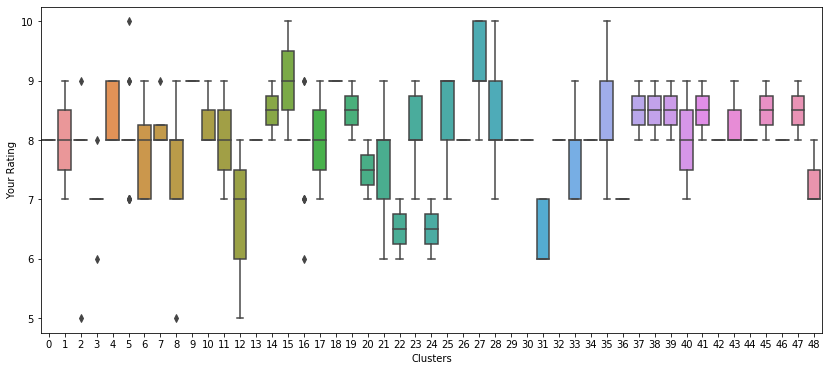

In [395]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Your Rating', data = data_film)

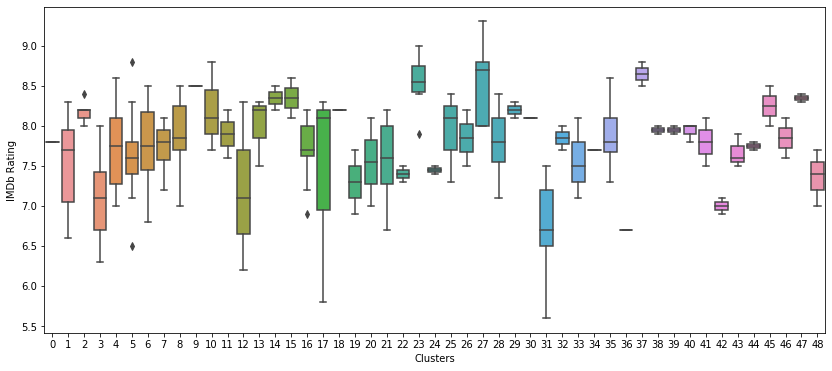

In [396]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'IMDb Rating', data = data_film)

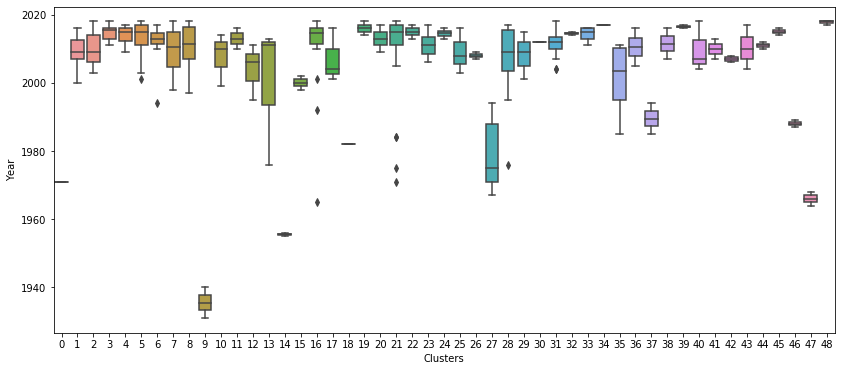

In [397]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Year', data = data_film)

#### Insight: I tend to rate newer movies lower that tend to have higher IMDb scores due to recency bias.

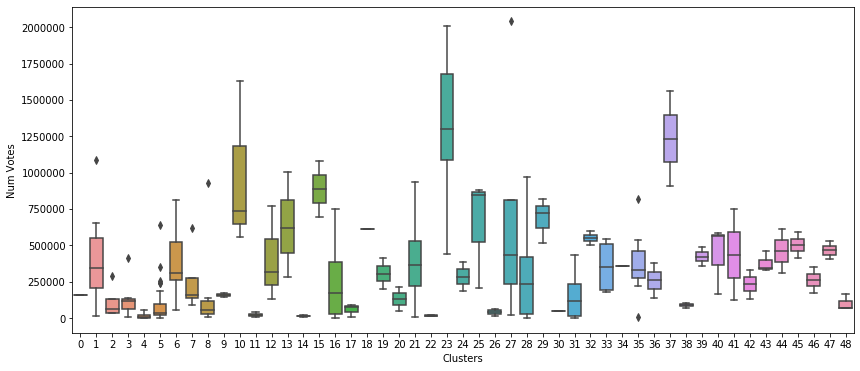

In [398]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Num Votes', data = data_film)